In [55]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
matplotlib.style.use('ggplot')
import pandas as pd
import random
import numpy as np
from random import sample
import statsmodels.formula.api as smf
import statsmodels.api as sm
import seaborn as sns
from scipy import stats
sns.set(style='ticks', color_codes=True)
import warnings
warnings.filterwarnings('ignore')
from bokeh.io import output_notebook, show
from bokeh.plotting import figure
output_notebook()
from bokeh.charts import Scatter
from bokeh.charts import Bar
from bokeh.charts import Histogram
from bokeh.layouts import gridplot
from bokeh.models import ColumnDataSource

Loading BokehJS ...

In [56]:
from IPython.core.display import HTML
css = open('style-table.css').read() + open('style-notebook.css').read()
HTML('<style>{}</style>'.format(css))

In [57]:
# Reading in the nfl draft data csv
df = pd.read_csv('nfl_draft_data.csv')
df_overall = df
df_overall.head(10)

,Player_Id,Year,Rnd,Pick,Tm,Player,Pos,Position Standard,First4AV,Age,...,Rush_Yds,Rush_TDs,Rec,Rec_Yds,Rec_Tds,Tkl,Def_Int,Sk,College/Univ,Unnamed: 32
0,WinsJa00,2015,1.0,1,TAM,Jameis Winston,QB,QB,13,21.0,...,311.0,7.0,NaN,NaN,NaN,NaN,NaN,NaN,Florida St.,NaN
1,MariMa01,2015,1.0,2,TEN,Marcus Mariota,QB,QB,9,21.0,...,516.0,4.0,1.0,41.0,1.0,NaN,NaN,NaN,Oregon,NaN
2,FowlDa00,2015,1.0,3,JAX,Dante Fowler,OLB,LB,0,21.0,...,NaN,NaN,NaN,NaN,NaN,16.0,NaN,2.5,Florida,NaN
3,CoopAm00,2015,1.0,4,OAK,Amari Cooper,WR,WR,9,21.0,...,-3.0,0.0,134.0,1970.0,9.0,NaN,NaN,NaN,Alabama,NaN
4,ScheBr00,2015,1.0,5,WAS,Brandon Scherff,T,T,7,23.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Iowa,NaN
5,WillLe02,2015,1.0,6,NYJ,Leonard Williams,DE,DE,9,21.0,...,NaN,NaN,NaN,NaN,NaN,56.0,NaN,9,USC,NaN
6,WhitKe00,2015,1.0,7,CHI,Kevin White,WR,WR,0,23.0,...,9.0,0.0,19.0,187.0,0.0,NaN,NaN,NaN,West Virginia,NaN
7,BeasVi00,2015,1.0,8,ATL,Vic Beasley,OLB,LB,7,23.0,...,NaN,NaN,NaN,NaN,NaN,44.0,1.0,13.5,Clemson,NaN
8,FlowEr00,2015,1.0,9,NYG,Ereck Flowers,T,T,9,21.0,...,NaN,NaN,1.0,-11.0,0.0,NaN,NaN,NaN,Miami (FL),NaN
9,GurlTo01,2015,1.0,10,STL,Todd Gurley,RB,RB,8,21.0,...,1697.0,14.0,47.0,390.0,0.0,NaN,NaN,NaN,Georgia,NaN


In [58]:
# Adding what I consider the Power 5 conferences and then if not in the top 5 then labeled "Not Power 5 Conferences"
def add_conference(df_overall): 
    conference = []
    nrows = len(df_overall.index) 
    
    acc = ("Florida St.", "Syracuse", "Miami", "North Carolina", "North Carolina St.", 
          "Duke", "Virginia", "Virginia Tech", "Boston College", "Clemson", "Wake Forest",
          "Pittsburgh", "Louisville", "Louisville", "Georgia Tech")
        
    big12 = ("Oklahoma", "Oklahoma St.", "TCU", "Baylor", "Iowa St.", "Texas", "Kansas", 
            "Kansas State", "West Virginia", "Texas Tech")
    
    sec = ("Alabama", "Georgia", "Vanderbilt", "Kentucky", "Florida", "Missouri", 
          "Mississippi", "Mississippi St.", "Texas A&M", "Louisiana St.", "Arkansas", 
          "Auburn", "South Carolina", "Tennessee")
    
    b1g = ("Northwestern", "Michigan", "Michigan St.", "Iowa", "Ohio St.", "Purdue", 
          "Indiana", "Rutgers", "Illinois", "Minnesota", "Penn St.", "Nebraska", "Maryland", 
          "Wisconsin")
    
    pac12 = ("Stanford", "California", "Arizona St.", "Arizona", "Washington", 
          "Washington St.", "Oregon", "Oregon St.", "USC", "UCLA", "Utah", "Colorado")
    
    
    for i in range(nrows): 
        if df_overall.loc[i]["College/Univ"] in pac12: 
            conference.append("Pac 12")
            
        elif df_overall.loc[i]["College/Univ"] in b1g:
            conference.append("Big 10")
            
        elif df_overall.loc[i]["College/Univ"] in sec: 
            conference.append("SEC")
            
        elif df_overall.loc[i]["College/Univ"] in acc:
            conference.append("ACC")
            
        elif df_overall.loc[i]["College/Univ"] in big12:
            conference.append("Big 12")
        
        else: 
            conference.append("Not Power 5")
    return conference



In [59]:
# Adding 'CFB_Conference' to the dataframe 
conference = add_conference(df_overall)
df_overall['Conference'] = conference

In [60]:
# After further analysis went back and did 'Power 5" or not 'Power 5' to better analysis the difference 
# between top football schools

def add_conference_2(df_overall): 
    conference_2 = []
    nrows = len(df_overall.index) 
    
    acc = ("Florida St.", "Syracuse", "Miami", "North Carolina", "North Carolina St.", 
          "Duke", "Virginia", "Virginia Tech", "Boston College", "Clemson", "Wake Forest",
          "Pittsburgh", "Louisville", "Louisville", "Georgia Tech")
        
    big12 = ("Oklahoma", "Oklahoma St.", "TCU", "Baylor", "Iowa St.", "Texas", "Kansas", 
            "Kansas State", "West Virginia", "Texas Tech")
    
    sec = ("Alabama", "Georgia", "Vanderbilt", "Kentucky", "Florida", "Missouri", 
          "Mississippi", "Mississippi St.", "Texas A&M", "Louisiana St.", "Arkansas", 
          "Auburn", "South Carolina", "Tennessee")
    
    b1g = ("Northwestern", "Michigan", "Michigan St.", "Iowa", "Ohio St.", "Purdue", 
          "Indiana", "Rutgers", "Illinois", "Minnesota", "Penn St.", "Nebraska", "Maryland", 
          "Wisconsin")
    
    pac12 = ("Stanford", "California", "Arizona St.", "Arizona", "Washington", 
          "Washington St.", "Oregon", "Oregon St.", "USC", "UCLA", "Utah", "Colorado")
    

    for i in range(nrows): 
        if df_overall.loc[i]["College/Univ"] in pac12: 
            conference_2.append("Power 5")
            
        elif df_overall.loc[i]["College/Univ"] in b1g:
            conference_2.append("Power 5")
            
        elif df_overall.loc[i]["College/Univ"] in sec: 
            conference_2.append("Power 5")
            
        elif df_overall.loc[i]["College/Univ"] in acc:
            conference_2.append("Power 5")
            
        elif df_overall.loc[i]["College/Univ"] in big12:
            conference_2.append("Power 5")
        
        else: 
            conference_2.append("Not Power 5")
    return conference_2


In [61]:
# Adding 'CFB_Conference_2' column to the dataframe 
conference_2 = add_conference_2(df_overall)
df_overall['Conference_2'] = conference_2

In [62]:
#Filling any empty value with 0 
df_overall.fillna(0)

,Player_Id,Year,Rnd,Pick,Tm,Player,Pos,Position Standard,First4AV,Age,...,Rec,Rec_Yds,Rec_Tds,Tkl,Def_Int,Sk,College/Univ,Unnamed: 32,Conference,Conference_2
0,WinsJa00,2015,1.0,1,TAM,Jameis Winston,QB,QB,13,21.0,...,0.0,0.0,0.0,0.0,0.0,0,Florida St.,0,ACC,Power 5
1,MariMa01,2015,1.0,2,TEN,Marcus Mariota,QB,QB,9,21.0,...,1.0,41.0,1.0,0.0,0.0,0,Oregon,0,Pac 12,Power 5
2,FowlDa00,2015,1.0,3,JAX,Dante Fowler,OLB,LB,0,21.0,...,0.0,0.0,0.0,16.0,0.0,2.5,Florida,0,SEC,Power 5
3,CoopAm00,2015,1.0,4,OAK,Amari Cooper,WR,WR,9,21.0,...,134.0,1970.0,9.0,0.0,0.0,0,Alabama,0,SEC,Power 5
4,ScheBr00,2015,1.0,5,WAS,Brandon Scherff,T,T,7,23.0,...,0.0,0.0,0.0,0.0,0.0,0,Iowa,0,Big 10,Power 5
5,WillLe02,2015,1.0,6,NYJ,Leonard Williams,DE,DE,9,21.0,...,0.0,0.0,0.0,56.0,0.0,9,USC,0,Pac 12,Power 5
6,WhitKe00,2015,1.0,7,CHI,Kevin White,WR,WR,0,23.0,...,19.0,187.0,0.0,0.0,0.0,0,West Virginia,0,Big 12,Power 5
7,BeasVi00,2015,1.0,8,ATL,Vic Beasley,OLB,LB,7,23.0,...,0.0,0.0,0.0,44.0,1.0,13.5,Clemson,0,ACC,Power 5
8,FlowEr00,2015,1.0,9,NYG,Ereck Flowers,T,T,9,21.0,...,1.0,-11.0,0.0,0.0,0.0,0,Miami (FL),0,Not Power 5,Not Power 5
9,GurlTo01,2015,1.0,10,STL,Todd Gurley,RB,RB,8,21.0,...,47.0,390.0,0.0,0.0,0.0,0,Georgia,0,SEC,Power 5


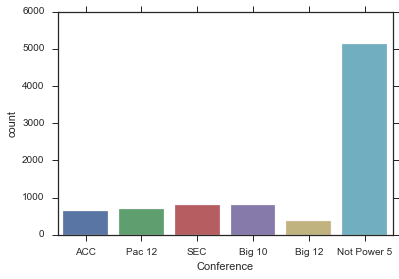

In [63]:
sns.countplot(x = "Conference", data = df_overall)

This is a bar graph to look at the count athletes drafted by power 5 conferences(Big 10, Pac 12, SEC, Big 12, ACC) and not power 5 conferences from 1985 to 2016.

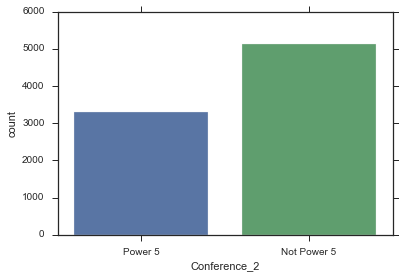

In [64]:
sns.countplot(x = "Conference_2", data = df_overall)

This is a bar graph to look at the count athletes drafted by power 5 conferences combined into one category (Big 10, Pac 12, SEC, Big 12, ACC) and not power 5 conferences from 1985 to 2016.

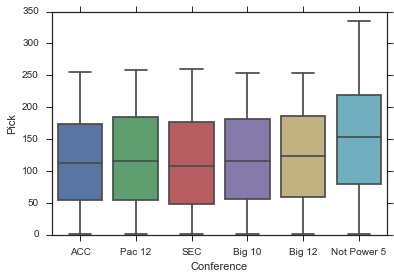

In [65]:
sns.boxplot(x = "Conference", y = "Pick", data = df_overall)

This is a box plot to look at the count athletes drafted by power 5 conferences(Big 10, Pac 12, SEC, Big 12, ACC) and not power 5 conferences from 1985 to 2016.

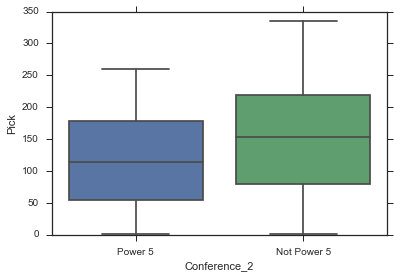

In [66]:
sns.boxplot(x = "Conference_2", y = "Pick", data = df_overall)

This is a bar graph to look at the count athletes drafted by power 5 conferences combined into one category (Big 10, Pac 12, SEC, Big 12, ACC) and not power 5 conferences from 1985 to 2016. From this data we can see that on average a power 5 player is picked much sooner than a Non-Power 5 player

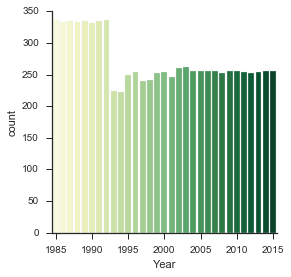

In [67]:
# Created this graph to make sure that there was sufficient data in each year to further analyze the data
years = np.arange(1985, 2016, 1)
g = sns.factorplot(x = "Year", data = df_overall, kind = "count",
                   palette = "YlGn", order = years)
g.set_xticklabels(step = 5, size = 10)

This is a bargraph to count the number of player drafted each year. While looking at this I saw that there were significantly less athletes drafted in 1993 and found that that is when they started the 7 round draft process and wanted to only look at rounds 1 to 7.

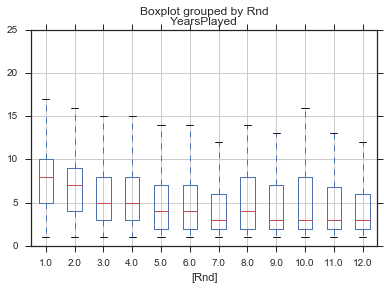

In [68]:
# Creating a 'YearsPlayed' Column to see how many years the players have played
df_overall['YearsPlayed'] = df_overall['To'] - df_overall['Year'] + 1
years_played_by_draft_year = pd.DataFrame({'count': df_overall.groupby(['Year', 'YearsPlayed']).size()})
df_overall[['Rnd', 'YearsPlayed']].boxplot(by='Rnd')

The career length looks to decrease consistently for the first 7 rounds, but has more outliers in later rounds. After additional online research I found that the modern draft only has 7 rounds, but previously there were more rounds. With this visusalization and the one above I decided to use only rounds 1 to 7 for my later analysis. 

In [69]:
# Only looking from the year less than 2011 because it is a stat calculated after being in the league for 4 years
First4AV = df_overall[df_overall.Year <= 2011]
print("total rows: " + str(len(First4AV)))
print("Average First4AV: " + str(np.mean(First4AV.First4AV)))
print("Median First4AV: " + str(np.median(First4AV.First4AV)))

total rows: 7416
Average First4AV: 10.481121898597626
Median First4AV: 4.0


First4AV is a measure that is used to calculate how a player performs within the first 4 years of their carreer and a method used to rank them. After 4 years in the league, half of the players have a First4AV of less than 4, I believe that this is because there are so many bust players that end up failing or hardly ever player. While the average is about 10.5 because there are a lot of high ranking players. I'd like to understand the relationship between round drafted, mean F4AV, and median F4AV. It's unfortunate I can't tie salaries to players because I could not properly pull the data and it was not in this notebook. In the future I'd like to try to put a price on First4AV, but currently this was not plausible for this project.

In [70]:
First4AV_1 = First4AV[["Year", "Rnd", "Pick", "First4AV"]]
First4AV_1 = First4AV.groupby(['Rnd']).agg({'First4AV' : [np.mean, np.median, np.max]})
First4AV_1

First4AV            
           mean median amax
Rnd                        
1.0   28.795134     28   88
2.0   19.173367     18   84
3.0   12.606930      8   63
4.0    9.862310      6   64
5.0    7.073944      3   72
6.0    5.381057      1   70
7.0    4.392344      0   48
8.0    4.981982      1   41
9.0    2.784753      0   36
10.0   3.299107      0   36
11.0   2.191964      0   39
12.0   1.753363      0   32

We can see that the mean First4AV declines steadily from rounds 1-7 and that once you get down to round 3 there is a much larger drop off in mean and median differences, due to many players being busts in later rounds. 

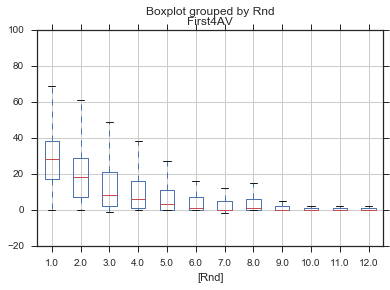

In [71]:
First4AV[['Rnd','First4AV']].boxplot(by = 'Rnd')

As the round decreases the average First4AV is also decreasing for a player. For further analysis I wanted to see how the player category would break out. 

In [72]:
First4AV_2 = First4AV[["Year", "Rnd", "Pick", "Position Standard", "First4AV"]]
First4AV_3 = First4AV_2.groupby(['Position Standard']).agg({'First4AV' : [np.mean, np.median, np.max]})

#flatten the multi-index table and sort on mean descending
First4AV_3 = pd.DataFrame(First4AV_3.to_records()) #flatten our multi-index table
First4AV_3.columns = ['Position', 'F4AV_mean', 'F4AV_median', 'F4AV_max']
First4AV_3['Mean_Median_Diff'] = First4AV_3['F4AV_mean'] - First4AV_3['F4AV_median']
First4AV_3.sort_values(by='F4AV_mean', ascending = False)

,Position,F4AV_mean,F4AV_median,F4AV_max,Mean_Median_Diff
0,C,12.869347,8.0,51,4.869347
11,T,12.651206,5.0,71,7.651206
2,DE,12.366352,7.0,88,5.366352
5,G,12.021186,7.0,62,5.021186
7,LB,11.015075,5.0,79,6.015075
3,DT,10.978456,5.0,68,5.978456
1,DB,10.368421,5.0,72,5.368421
10,RB,10.309917,3.0,84,7.309917
9,QB,10.101408,1.0,83,9.101408
13,WR,9.779348,2.0,73,7.779348


This is interesting to me because many people always think of WR, RB, and QB positions being the most valuable. But when looking into this Offensive and Defensive lineman have a higher average value. The one thing that stuck out most to me is the difference in the QB Mean and Median being just over 9. I am going to do further analysis on the QB position and create an additional scoring system more like a fantasy football one to look at QB's further. Also because I do not like the First4AV stat as much because we are missing data on some of the more recent QB's. But first am going to do a little more analysis on First4AV to compare the data later on. 

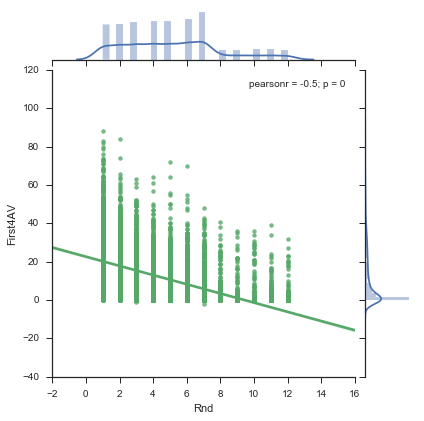

In [73]:
g = sns.JointGrid(x = "Rnd", y = "First4AV", data = First4AV)
g = g.annotate(stats.pearsonr)
g = g.plot(sns.regplot,sns.distplot)

With a p-value of 0 I can conclude that my initial hypothesis of First4AV more likely to be higher when drafter in an earlier round. But with so much data I am next going to break down the data into just quarterbacks. Also with a -0.5 pearson r-value we can see that there is a negative correlation for First4AV and the Round that one is selected. Meaning that the two variables are correlated with one another. 

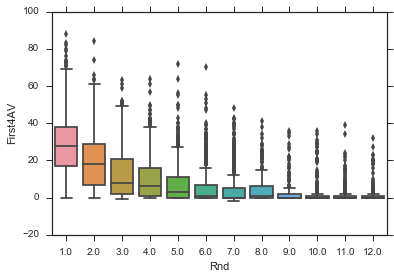

In [74]:
sns.boxplot(x = "Rnd", y = "First4AV", data = First4AV)

Another Boxplot to further look at the data in an easier way for the quartiles, mean, and median and to better see the outliers. 

In [75]:
# Creating a dataframe where the position is Quarterback and where games played is greater than 10 to ensure
# that the quarterbacks have played and have stats
df_qb_1 = df_overall[df_overall["Pos"] == "QB"] 
df_qb = df_qb_1[df_qb_1["G"] > 10]
df_qb = df_qb[df_qb.Rnd < 8.0]


As Mentioned above in my analysis I am only going to include rounds 1 to 7 and now am beginning to look further into just quarterbacks and in this analysis I wanted to make sure that they had at least 10 games played to ensure there was sufficient data for each athlete in the data set. 

In [76]:
# Creating Additional columns to create a scoring rubric for the quarterbacks
df_qb["Pass_Att_G"] = (df_qb["Pass_Att"] / df_qb["G"]).fillna(0)
df_qb["Pass_Completion"] = (df_qb["Cmp"] / df_qb["Pass_Att"]).fillna(0)
df_qb["Pass_Yds_G"] = (df_qb["Pass_Yds"] / df_qb["G"]).fillna(0)
df_qb["Pass_TDs_G"] = (df_qb["Pass_TD"] / df_qb["G"]).fillna(0)
df_qb["Pass_Ints_G"] = (df_qb["Pass_Int"] / df_qb["G"]).fillna(0)
df_qb["Rush_Att_G"] = (df_qb["Rush_Att"] / df_qb["G"]).fillna(0)
df_qb["Rush_Yds_G"] = (df_qb["Rush_Yds"] / df_qb["G"]).fillna(0)
df_qb["Rush_TDs_G"] = (df_qb["Rush_TDs"] / df_qb["G"]).fillna(0)
df_qb["Rec_G"] = (df_qb["Rec"] / df_qb["G"]).fillna(0)
df_qb["Rec_Yds_G"] = (df_qb["Rec_Yds"] / df_qb["G"]).fillna(0)
df_qb["Rec_Tds_G"] = (df_qb["Rec_Tds"] / df_qb["G"]).fillna(0)

In [77]:
df_qb["Total_QB_Score"] = (df_qb["Pass_Completion"] * 10) + (df_qb["Pass_Yds_G"] * 0.025) + (df_qb["Pass_TDs_G"] * 6) - (df_qb["Pass_Ints_G"] * 3) + (df_qb["Rush_Yds_G"] * 0.1) + (df_qb["Rush_TDs_G"] * 6) + (df_qb["Rec_Yds_G"] * .10) + (df_qb["Rec_Tds_G"] * 6)

In this I created a scoring system similar to a fantasy style to calculate the average points per game for a quarterback. In the system I multiplied their pass completion percentage by 10, multiplied the pass yards per game by 2.5%, gave 6 points for each type of touchdown, subracted 3 points for each interception, and then multuplied each rushing yard or receiving yard by 10%.

In [78]:
# Calculating the mean difference for Total QB Score - mean QB Score
df_qb["Mean_Diff"] = df_qb["Total_QB_Score"] - (np.mean(df_qb.Total_QB_Score))

In [79]:
df_qb_3 = df_qb[["Player","Year", "Rnd", "Pick", "Conference_2",  "Total_QB_Score", "Mean_Diff"]]
# # df_qb_3 = df_qb_3.agg({'Total_QB_Score' : [np.mean, np.median, np.max]})

#flatten the multi-index table and sort on mean descending
# df_qb_3 = pd.DataFrame(df_qb_3.to_records()) #flatten our multi-index table
df_qb_3.columns = ["Player","Year", "Rnd", "Pick", "Conference_2",  "Total_QB_Score", "Mean_Diff"]
df_qb_3.sort_values(by="Mean_Diff", ascending = False).head(10)


,Player,Year,Rnd,Pick,Conference_2,Total_QB_Score,Mean_Diff
2569,Aaron Rodgers,2005,1.0,24,Power 5,26.652640,13.345016
1019,Cam Newton,2011,1.0,1,Power 5,25.449111,12.141487
1,Marcus Mariota,2015,1.0,2,Power 5,24.728111,11.420487
840,Russell Wilson,2012,3.0,75,Power 5,24.725186,11.417562
766,Andrew Luck,2012,1.0,1,Power 5,24.120493,10.812869
3610,Drew Brees,2001,2.0,32,Power 5,23.684868,10.377244
4023,Tom Brady,2000,6.0,199,Power 5,23.306453,9.998829
4332,Peyton Manning,1998,1.0,1,Power 5,23.274212,9.966587
1528,Matthew Stafford,2009,1.0,1,Power 5,22.066357,8.758733
4089,Daunte Culpepper,1999,1.0,11,Not Power 5,22.006969,8.699345


Based on my scoring system these are the quarterbacks that ranked in the top overall totals in scoring. With my above analysis, we can see that 8 out of 10 of these quarterbacks were drafted in the first two rounds and five of them in the top two picks. In addition to this 9 out of 10 of these quarterbacks were in a power 5 conference. 

This struck my interest and I wanted to look further into the first round QB's

In [80]:
df_qb_3 = df_qb[df_qb.Rnd == 1.0]
df_qb_3 = df_qb_3[["Player","Year", "Rnd", "Pick", "Conference_2",  "Total_QB_Score", "Mean_Diff"]]
# # df_qb_3 = df_qb_3.agg({'Total_QB_Score' : [np.mean, np.median, np.max]})

#flatten the multi-index table and sort on mean descending
# df_qb_3 = pd.DataFrame(df_qb_3.to_records()) #flatten our multi-index table
df_qb_3.columns = ["Player","Year", "Rnd", "Pick", "Conference_2",  "Total_QB_Score", "Mean_Diff"]
df_qb_3.sort_values(by="Mean_Diff", ascending = False)


,Player,Year,Rnd,Pick,Conference_2,Total_QB_Score,Mean_Diff
2569,Aaron Rodgers,2005,1.0,24,Power 5,26.652640,13.345016
1019,Cam Newton,2011,1.0,1,Power 5,25.449111,12.141487
1,Marcus Mariota,2015,1.0,2,Power 5,24.728111,11.420487
766,Andrew Luck,2012,1.0,1,Power 5,24.120493,10.812869
4332,Peyton Manning,1998,1.0,1,Power 5,23.274212,9.966587
1528,Matthew Stafford,2009,1.0,1,Power 5,22.066357,8.758733
4089,Daunte Culpepper,1999,1.0,11,Not Power 5,22.006969,8.699345
0,Jameis Winston,2015,1.0,1,Power 5,21.997260,8.689635
767,Robert Griffin,2012,1.0,2,Power 5,21.473560,8.165936
1786,Matt Ryan,2008,1.0,3,Not Power 5,21.412999,8.105375


In [81]:
print("total rows: " + str(len(df_qb_3)))
print("Average Total QB Score: " + str(np.mean(df_qb_3.Total_QB_Score)))
print("Median QB Score: " + str(np.median(df_qb_3.Total_QB_Score)))
print("Max Total QB Score: "+ str(np.max(df_qb_3.Total_QB_Score)))
print("Min Total QB Score: "+ str(np.min(df_qb_3.Total_QB_Score)))
print("Rnd 1 Percentage Players in Power 5: " + str(len(df_qb_3[df_qb_3['Conference_2'] == 'Power 5'])/len(df_qb_3['Conference_2'])*100)+ " %")

total rows: 65
Average Total QB Score: 15.987406788404476
Median QB Score: 15.7392729509
Max Total QB Score: 26.6526400969
Min Total QB Score: 6.01730769231
Rnd 1 Percentage Players in Power 5: 53.84615384615385 %


This dataframe compared to the statistics above is interesting to me because although about 54% of first round QB's come from a Power 5 University. It looks like the ones that are really excelling primarily come from Power 5 school, with 8 of the top 10 first round QB's being from a Power 5 school.

In [82]:
df_qb_5 = df_qb[df_qb.Rnd == 2.0]

df_qb_5 = df_qb_5[["Player","Year", "Rnd", "Pick", "Conference_2",  "Total_QB_Score", "Mean_Diff"]]
# # df_qb_3 = df_qb_3.agg({'Total_QB_Score' : [np.mean, np.median, np.max]})

#flatten the multi-index table and sort on mean descending
# df_qb_3 = pd.DataFrame(df_qb_3.to_records()) #flatten our multi-index table
df_qb_5.columns = ["Player","Year", "Rnd", "Pick", "Conference_2",  "Total_QB_Score", "Mean_Diff"]
df_qb_5.sort_values(by="Mean_Diff", ascending = False)


,Player,Year,Rnd,Pick,Conference_2,Total_QB_Score,Mean_Diff
3610,Drew Brees,2001,2.0,32,Power 5,23.684868,10.377244
291,Derek Carr,2014,2.0,36,Not Power 5,21.159435,7.851811
1053,Andy Dalton,2011,2.0,35,Power 5,21.118135,7.810511
8135,Randall Cunningham,1985,2.0,37,Not Power 5,19.897331,6.589707
6130,Brett Favre HOF,1991,2.0,33,Not Power 5,19.783544,6.475920
1054,Colin Kaepernick,2011,2.0,36,Not Power 5,19.480241,6.172617
4614,Jake Plummer,1997,2.0,42,Power 5,16.214016,2.906392
550,Geno Smith,2013,2.0,39,Power 5,15.392795,2.085171
5126,Kordell Stewart,1995,2.0,60,Power 5,15.099801,1.792177
1840,Chad Henne,2008,2.0,57,Power 5,14.172577,0.864952


In [83]:
print("total rows: " + str(len(df_qb_5)))
print("Average Total QB Score: " + str(np.mean(df_qb_5.Total_QB_Score)))
print("Median QB Score: " + str(np.median(df_qb_5.Total_QB_Score)))
print("Max Total QB Score: "+ str(np.max(df_qb_5.Total_QB_Score)))
print("Min Total QB Score: "+ str(np.min(df_qb_5.Total_QB_Score)))
print("Rnd 2 Percentage Players in Power 5: " + str(len(df_qb_5[df_qb_5['Conference_2'] == 'Power 5'])/len(df_qb_5['Conference_2'])*100)+ " %")

total rows: 27
Average Total QB Score: 13.414425917049655
Median QB Score: 13.2366878007
Max Total QB Score: 23.6848679321
Min Total QB Score: 0.623076923077
Rnd 2 Percentage Players in Power 5: 48.148148148148145 %


This dataframe compared to the statistics above is interesting to me because although about 50% of first round QB's come from a Power 5 University. It looks like the ones that are really excelling primarily come from both Power 5 and Non-Power 5, with 6 of the top 10 first round QB's being from a Power 5 school.

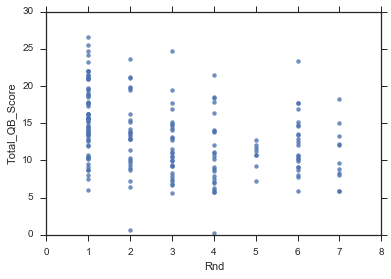

In [84]:
ax = sns.regplot(df_qb.Rnd,df_qb.Total_QB_Score,ci=0,fit_reg=False)
ax.set_ylim([0,30]);

With this regplot we can see that there are two quarterbacks that have 0 points this is a result of missing data and I will take them out of the data to ensure that they do not skew the data. Also going to only go until round 7 because there are only a few points from rounds 8 to 11 and those will not be averages rather just one good player that was drafted long ago. 

In [85]:
df_qb = df_qb[df_qb.Total_QB_Score > 5]

As Mentioned above I want to take out QB's that do not have any points and that is why I said Total_QB_Score > 5

In [86]:
print("total rows: " + str(len(df_qb)))
print("Average Total QB Score: " + str(np.mean(df_qb.Total_QB_Score)))
print("Median QB Score: " + str(np.median(df_qb.Total_QB_Score)))
print("Max Total QB Score: "+ str(np.max(df_qb.Total_QB_Score)))
print("Min Total QB Score: "+ str(np.min(df_qb.Total_QB_Score)))
print("Percentage Players in Power 5: " + str(len(df_qb[df_qb['Conference_2'] == 'Power 5'])/len(df_qb['Conference_2'])*100)+ " %")

total rows: 186
Average Total QB Score: 13.44609630174434
Median QB Score: 13.0287759325
Max Total QB Score: 26.6526400969
Min Total QB Score: 5.6272979798
Percentage Players in Power 5: 46.236559139784944 %


An overview of the all of the QB's in the dataset with the overall QB's from Power 5 conferences

In [87]:
df_qb.corr()
r,p = stats.pearsonr(df_qb['Total_QB_Score'],df_qb['First4AV'])
print(r,p)
tau, p_value = stats.kendalltau(df_qb['Total_QB_Score'],df_qb['First4AV'])
print("Kendall's tau:",tau,p_value)
correlation,pvalue = stats.spearmanr(df_qb['Total_QB_Score'],df_qb['First4AV'])
print("Spearman's rho:",correlation,pvalue)

0.775103798064 1.54519602296e-38
Kendall's tau: 0.617894235542 3.71331700037e-35
Spearman's rho: 0.818162061578 4.28675142973e-46


Looking at how Total_QB_Score and First4AV coincide with eachother

In [88]:
Total_QB_Score = df_qb[["Year", "Rnd", "Pick", "Position Standard", "Total_QB_Score"]]
Total_QB_Score = Total_QB_Score.groupby(['Rnd']).agg({'Total_QB_Score' : [np.mean, np.median, np.max]})
Total_QB_Score

Total_QB_Score                      
              mean     median       amax
Rnd                                     
1.0      15.987407  15.739273  26.652640
2.0      13.906401  13.386707  23.684868
3.0      11.846467  11.023071  24.725186
4.0      11.207700  10.394861  21.513723
5.0      10.713149  10.976784  12.768499
6.0      12.376712  12.023558  23.306453
7.0      10.665830   9.610515  18.191527

From rounds 1 to 5 there is a constant decrease, but then starting in round 6 there is an increase and I this is because of Tom Brady being in the 6th round and having a score of 23.31 bringing up the average. 

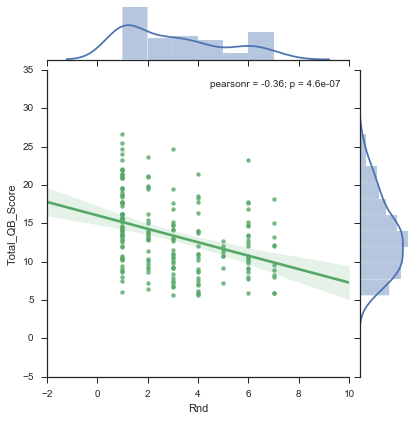

In [89]:
g = sns.JointGrid(x = "Rnd", y = "Total_QB_Score", data = df_qb)
g = g.annotate(stats.pearsonr)
g = g.plot(sns.regplot,sns.distplot)

With a p-value of almost 0 I can conclude this does not tell us much because of the wide variety of values in each round. This is because there are many bust players in each round, but more successful players in the earlier rounds too.Also with a -0.36 pearson r-value we can see that there is a negative correlation for Total_QB_Score and the Round that one is selected. These numbers are similar to First4AV, but show that typically being drafted in a higher round does not ensure that the quarterback will be successful. This is very true when you think about the NFL because there are a lot of bust quarterbacks taken in the earlier rounds that do not end up being successful in the NFL.  

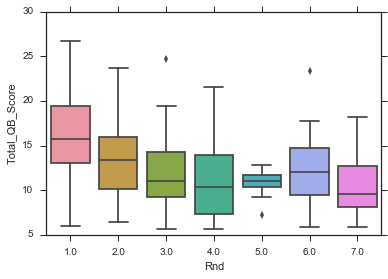

In [90]:
sns.boxplot(x = "Rnd", y = "Total_QB_Score", data = df_qb)

A boxplot of the data above to more easily visualize the data and looks similar to the First4AV stats.

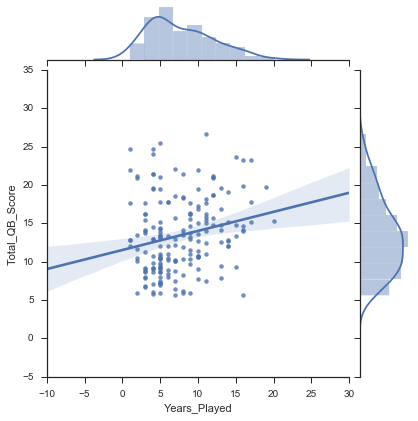

In [91]:
df_qb["Years_Played"] = df_qb["To"] - df_qb["Year"]
g = sns.JointGrid(x = 'Years_Played', y = "Total_QB_Score", data = df_qb)
g = g.plot(sns.regplot,sns.distplot)

There looks to be no correlation on trend in years played to Total_QB_Score and the variables must be independent of one another. 

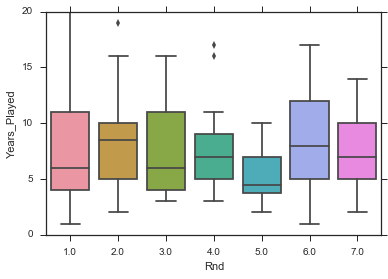

In [92]:
sns.boxplot(x = "Rnd", y = "Years_Played", data = df_qb)

In [93]:
qb_pivot = df_qb.pivot_table(index = 'Rnd', columns = 'Conference', values = 'Total_QB_Score', aggfunc=np.mean).fillna(0)
qb_pivot

Conference,ACC,Big 10,Big 12,Not Power 5,Pac 12,SEC
Rnd,,,,,,
1.0,18.703205,14.712580,17.134033,14.489323,16.576239,17.332664
2.0,0.000000,14.043298,18.255465,13.951421,11.937440,13.783333
3.0,13.547854,17.181338,14.311195,10.304324,13.104635,9.874051
4.0,13.236841,18.923354,9.470890,10.388667,11.419614,7.296949
5.0,9.256645,10.975193,0.000000,10.432416,12.768499,0.000000
6.0,17.770747,15.549695,17.703668,11.184387,12.406296,0.000000
7.0,0.000000,0.000000,0.000000,11.311247,8.944718,0.000000


Now I am further analyzing the QBS by round and what conference they come from to make a Quarterback successful

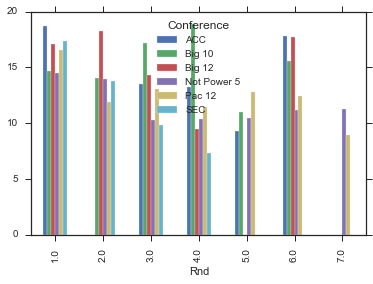

In [94]:
qb_pivot.plot.bar()

In [95]:
from scipy.stats import chi2_contingency
chi2, p, dof, ex = chi2_contingency(qb_pivot)
print("chi2 = ", chi2)
print("p-val = ", p)
print("degree of freedom = ",dof)
print("Expected:")
pd.DataFrame(ex)

chi2 =  98.4670510789
p-val =  3.23719972349e-09
degree of freedom =  30
Expected:


,0,1,2,3,4,5
0,15.656829,19.731100,16.598191,17.718019,18.818226,10.425680
1,11.388168,14.351634,12.072878,12.887397,13.687645,7.583234
2,12.393332,15.618366,13.138478,14.024890,14.895771,8.252560
3,11.192807,14.105436,11.865771,12.666318,13.452838,7.453146
4,6.872487,8.660868,7.285693,7.777236,8.260167,4.576301
5,11.806510,14.878838,12.516373,13.360813,14.190458,7.861803
6,3.205159,4.039215,3.397868,3.627111,3.852338,2.134274


While looking at the visual above and these numbers I found it very hard to find any correlations that is why above I further broke down the data into Power 5 and Not Power 5 to better look into the data because the different conferences are hard to tell so I will pair the Power 5 together. 

In [96]:
qb_pivot_2 = df_qb.pivot_table(index = 'Conference', values = 'Total_QB_Score', aggfunc=np.mean).fillna(0)
qb_pivot_2

,Total_QB_Score
Conference,
ACC,15.740735
Big 10,15.182454
Big 12,15.600371
Not Power 5,12.280199
Pac 12,13.699535
SEC,14.777298


Although you can see that the Power 5 conferences mean Total_QB_Score are much higher than Not Power 5 conferences. It is hard to say which conference typically would offer the highest rate of success because all of the averages are very similar. 

In [97]:
qb_pivot_3 = df_qb.pivot_table(index = 'Rnd', columns = 'Conference_2', values = 'Total_QB_Score', aggfunc=np.mean).fillna(0)
qb_pivot_3

Conference_2,Not Power 5,Power 5
Rnd,,
1.0,14.489323,17.271478
2.0,13.951421,13.861381
3.0,10.304324,13.498763
4.0,10.388667,12.175649
5.0,10.432416,10.993883
6.0,11.184387,15.754966
7.0,11.311247,8.944718


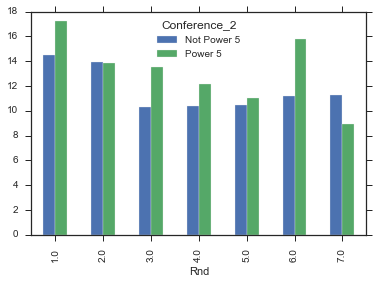

In [98]:
qb_pivot_3.plot.bar()

Generally speaking the data shoes that the higher round you are drafter shows how much more likely you will be successful in the NFL. In addition to this many quarterbacks that played in a Power 5 conference are more likely to be successful when comparing each round to Power 5 and Not Power 5

In [99]:
from scipy.stats import chi2_contingency
chi2, p, dof, ex = chi2_contingency(qb_pivot_3)
print("chi2 = ", chi2)
print("p-val = ", p)
print("degree of freedom = ",dof)
print("Expected:")
pd.DataFrame(ex)

chi2 =  1.26111490931
p-val =  0.973758523873
degree of freedom =  6
Expected:


,0,1
0,14.930734,16.830068
1,13.074781,14.738020
2,11.189817,12.613270
3,10.607471,11.956844
4,10.072490,11.353808
5,12.664174,14.275179
6,9.522317,10.733648


Below are additional visualizations I created using seaborn and Bokeh to create more colorful visualizations and additional information for the reader to look at based on conferences.

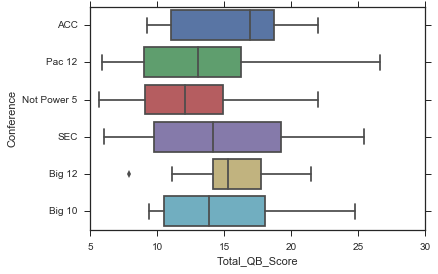

In [100]:
sns.boxplot(x = "Total_QB_Score", y = "Conference", data = df_qb)

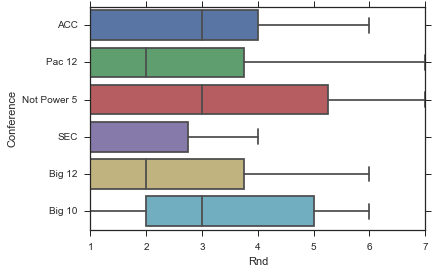

In [101]:
sns.boxplot(x = "Rnd", y = "Conference", data = df_qb)

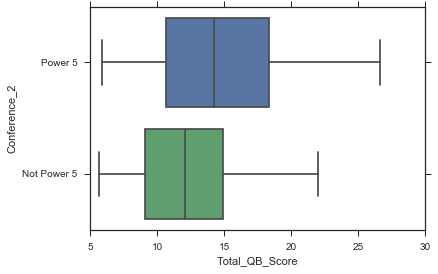

In [102]:
sns.boxplot(x = "Total_QB_Score", y = "Conference_2", data = df_qb)

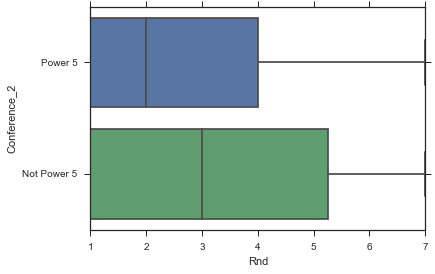

In [103]:
sns.boxplot(x = "Rnd", y = "Conference_2", data = df_qb)

In [104]:
### YOUR CODE HERE
hist = Histogram(df_qb, values='Total_QB_Score', color='Conference_2',
                 bins=20,title="QB Distribution (color grouped by Conference)",
                 plot_width=700, plot_height=500)
show(hist)

In [105]:
p = Scatter(df_qb, x='Rnd', y='Total_QB_Score', 
            color='Conference', legend='top_right',
            plot_width=900, plot_height=350)
show(p)

In [106]:
p = Bar(df_qb, label='Rnd', values='Total_QB_Score', agg='mean', 
        title="Average QB Score By Round", legend=None, tools='crosshair',
        plot_width=500, plot_height=500)
show(p)

In [107]:
p = Bar(df_qb, label='Conference_2', values='Total_QB_Score', agg='mean', 
        title="Average QB Score By Power 5 or Not Power 5 Conference", legend=None, tools='crosshair',
        plot_width=500, plot_height=500)
show(p)

In [108]:
df_qb.to_csv('df_qb.csv')

Exporting the dataframe that I manipulated into a csv to look at further in excel and tableau